In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1)

In [13]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

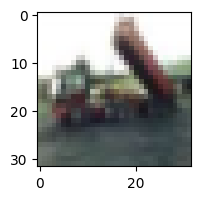

In [9]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[2])

In [14]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
classes[8]

'ship'

In [18]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

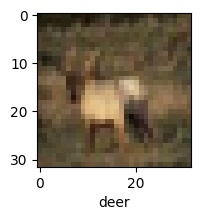

In [22]:
plot_sample(X_train,y_train,3)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [25]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics= ['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8141 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6244 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5426 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4819 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4348 - accuracy: 0.4950


In [26]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4537 - accuracy: 0.4840


[1.4537259340286255, 0.48399999737739563]

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report for ANN is:\n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 2s 6ms/step
classification report for ANN is:
               precision    recall  f1-score   support

           0       0.63      0.49      0.55      1000
           1       0.58      0.68      0.62      1000
           2       0.33      0.47      0.38      1000
           3       0.36      0.28      0.31      1000
           4       0.51      0.28      0.36      1000
           5       0.36      0.44      0.40      1000
           6       0.46      0.65      0.53      1000
           7       0.67      0.43      0.52      1000
           8       0.72      0.50      0.59      1000
           9       0.48      0.63      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [34]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [35]:
cnn.compile(optimizer='adam',
            loss= 'sparse_categorical_crossentropy',
               metrics =['accuracy'])

In [38]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6141 - accuracy: 0.7852
Epoch 2/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5795 - accuracy: 0.7954
Epoch 3/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5515 - accuracy: 0.8077
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5208 - accuracy: 0.8166
Epoch 5/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4967 - accuracy: 0.8265
Epoch 6/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4660 - accuracy: 0.8365
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4451 - accuracy: 0.8431
Epoch 8/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4171 - accuracy: 0.8527
Epoch 9/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.3925 - accuracy: 0.8605
Epoch 10/30
1563/1563 [==============================] - 12s 8ms/step - l

In [39]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4592 - accuracy: 0.6645


[2.4591774940490723, 0.6644999980926514]

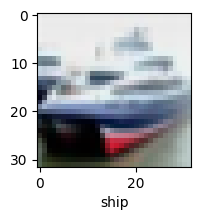

In [41]:
y_test = y_test.reshape(-1)
plot_sample(X_test,y_test,1)

In [42]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[6.3754232e-03, 6.3903179e-05, 5.3128018e-03, 9.7874635e-01,
        8.4586818e-06, 8.8920863e-03, 1.6019710e-08, 1.1124381e-05,
        6.7755180e-05, 5.2201468e-04],
       [5.7667751e-07, 5.4324617e-10, 2.0201928e-15, 3.1451985e-23,
        8.0473399e-23, 6.9896548e-29, 1.1303251e-21, 1.7176970e-30,
        9.9999940e-01, 7.2201874e-14],
       [1.3013321e-04, 9.9982637e-01, 5.3781809e-11, 4.7765972e-11,
        5.3578008e-13, 2.5626232e-13, 1.7153310e-11, 3.9660553e-10,
        4.3525361e-05, 2.4453296e-08],
       [9.9757975e-01, 1.2315504e-04, 3.1963154e-06, 5.3276689e-11,
        6.6098980e-11, 4.6929845e-16, 5.0159432e-13, 1.1823353e-14,
        2.2925336e-03, 1.3090271e-06],
       [3.9223939e-22, 2.5078499e-13, 1.3351016e-05, 3.7951002e-05,
        5.3079766e-01, 6.8551431e-13, 4.6915111e-01, 4.9602042e-15,
        3.1990248e-12, 4.2197195e-15]], dtype=float32)

In [43]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

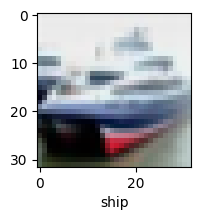

In [45]:
plot_sample(X_test,y_test,1)

In [47]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [48]:
classes[y_classes[1]]

'ship'

In [49]:
print("Classification report for CNN :\n",classification_report(y_test, y_classes))

Classification report for CNN :
               precision    recall  f1-score   support

           0       0.66      0.75      0.70      1000
           1       0.75      0.81      0.78      1000
           2       0.56      0.50      0.53      1000
           3       0.49      0.45      0.47      1000
           4       0.57      0.60      0.58      1000
           5       0.58      0.58      0.58      1000
           6       0.73      0.74      0.74      1000
           7       0.72      0.70      0.71      1000
           8       0.81      0.77      0.79      1000
           9       0.75      0.74      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

